# Practical 7 - Part 1A
The aim of part 1A is to calculate the homography that best maps two sets of points to one another.  We will (eventually) use this for creating panoramas, and for calculating the 3D pose of planes.  You should use this
template for your code and fill in the missing sections marked "TO DO"


# Import libraries 

In [7]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Define a set of 2D points, then apply a homography to them

In [8]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])

# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
#print(pts1Hom)
#print(pts1Hom.shape)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])

# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)
#print()
#print(pts2Hom)
#print(pts2Hom.shape)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))
#print()
#print(pts2Cart)

# Add a small amount of noise
noiseLevel = 4.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)

# Plot the first (original) and  second (after applying the homography) set of points 

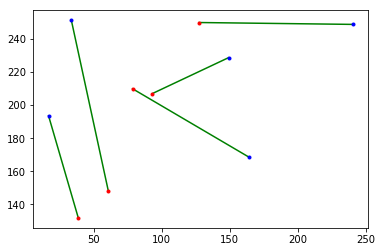

In [9]:
# Plot a green line between pairs of actual points (red) and estimated points (magenta)
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

Now our goal is to estimate the homography that maps the first points to the second set of points.

# ****TO DO****: Fill in the details of these routines (solveAXEqualsZero and calcBestHomography). 

In [10]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0   
    u,s,v = np.linalg.svd(A)
    print(v.shape)
    v_last = v[-1,:]
    return v_last

In [13]:
# This function should apply the direct linear transform (DLT) algorithm to calculate the best 
# homography that maps the points in pts1Cart to their corresonding matching in pts2Cart
def calcBestHomography(pts1Cart, pts2Cart):    
    # TO DO: replace this
    #H = 

    # TO DO: 
    # First convert points into homogeneous representation
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    
    # Then construct the matrix A, size (n_points,9)
    num_examples = 10
    A = np.zeros((num_examples,9))
    
    #Populate the matrix
    for i in range(5):
        uv = pts1Hom[:, i]
        xy = pts2Hom[:, i]
        A[2 * i,     :] = np.hstack([[0, 0, 0], -uv.T, uv.T * xy[1]])
        A[2 * i + 1, :] = np.hstack([uv.T, [0, 0, 0], -uv.T * xy[0]])
    
    #print("A.shape {}".format(A.shape))
    
    #print("A {}".format(A))
    # Solve Ah = 0
    h = solveAXEqualsZero(A)
    #print(h.shape)
    
    # Reshape h into the matrix H, values of h go first into rows of H
    H = np.reshape(h, (3, 3))
    
    return H

Once you have completed the two routines above, we will see how well they work by applying the mapping and measuring the square distance between the desired and actual positions

(9, 9)


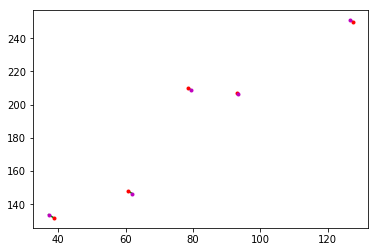

In [14]:
# TO DO: Fill in the details of this function from above 
HEst = calcBestHomography(pts1Cart, pts2Cart)
#print("size of 1hom {}".format(pts1Hom.shape))

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a green line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'g-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

# Other things **** TO DO ****

1: Convince yourself that the homography is ambiguous up to scale (by
multiplying it by a constant factor and showing it does the same thing).
Can you see why this is the case mathematically?

2: Show empirically that your homography routine can map any four points exactly to any
other four points

In [15]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])

# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])

# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))

# Add a small amount of noise
#noiseLevel = 4.0
#pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)

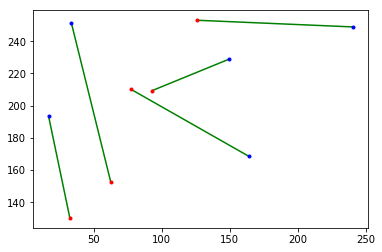

In [16]:
# Plot a green line between pairs of actual points (red) and estimated points (magenta)
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

(9, 9)


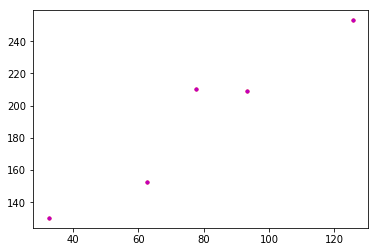

In [17]:
# TO DO: Fill in the details of this function from above 
HEst = calcBestHomography(pts1Cart, pts2Cart)
#print("size of 1hom {}".format(pts1Hom.shape))

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a green line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'g-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

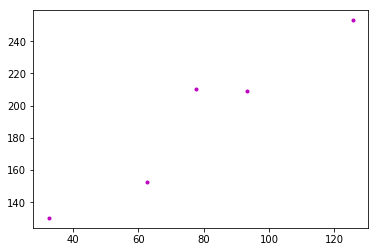

In [18]:
for cPoint in range(0, nPoint):
    plt.plot(pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 
plt.show()

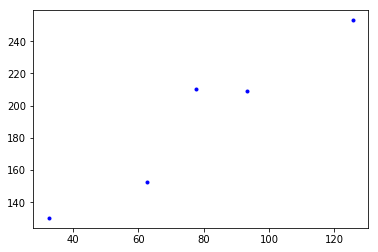

In [19]:
for cPoint in range(0, nPoint):
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'b.') 
plt.show()

In [20]:
pts2EstCart

array([[ 125.70884347,   32.48784502,   62.56729828,   77.593613  ,
          93.14243158],
       [ 253.02757825,  130.33247339,  152.58250426,  210.06357774,
         209.40250472]])

In [21]:
pts2Cart

array([[ 125.70884347,   32.48784502,   62.56729828,   77.593613  ,
          93.14243158],
       [ 253.02757825,  130.33247339,  152.58250426,  210.06357774,
         209.40250472]])